# JAWABAN TUGAS 2 dan 3

## TUGAS 2
**Menurut Anda, apakah term yang dihasilkan (X_kbest_features) pada feature selection sudah memiliki informasi yang relevan?**


YA, feature selection membantu dalam memberikan informasi yang relevan, Lebih baik menggunakan X_kbest yang standar dan tidak terlalu banyak atau terlalu sedikit X karena bisa menyebabkan bias/jelek dalam data

**Resume berdasarkan pengalaman Anda dalam melakukan pre-processing dan feature engineering.**

Berdasarkan pengalaman saya dalam melakukan proses ini ternyata cukup panjang dan memakan banyak waktu, sedikit demi sedikit error mulai saya perbaiki dan akhirnya bisa berjalan lancar

##TUGAS 3
Akurasi Support Vector Classification. : 0.6351648351648351

Akurasi Naive Bayes classifier for multinomial models : 0.6373626373626373

Berdasarkan akurasi diatas dapat disimpulkan bahwa model naive bayes lebih baik daripada model support vector clasification untuk kasus data ini.

**Resume**

Pengolahan data ini membuat saya harus membuka referensi referensi data preprocessing di materi kelas data science. Referensi ini berguna untuk mengatasi data nan. Namun model saya masih jauh dari sempurna karena belum bisa mendapat akurasi yang tinggi, saya tidak tau penyebabnya apakah karena datanya memang lebih banyak ke 5 atau teknik saya yang kurang bagus. Semoga dipertemuan selanjutnya bisa dijelaskan, terima kasih.


 



In [372]:
#import library yang dibutuhkan
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [373]:
!pip -q install sastrawi

In [374]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Import Data**

In [375]:
#!wget https://drive.google.com/file/d/1qn5WXp-H95_FL_Rx5oqvfZaflYdHsnrF/view?usp=sharing

In [785]:
data1 = pd.read_csv('/content/20191002-reviews.csv') #sebelumnya saya sudah download dan sudah memasukkan ke penyimpanan google colaboratory
data1

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,10/2/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1669,103357924,beli-harddisk-eksternal,Rodiyan,4,NaN,cukup puas,"barang sesuai dengan perkiraan, cuma bonus yan...",0,0,0,True,20.17,10-Jul-17,desktop,10/2/2019
1670,103357924,beli-harddisk-eksternal,Maulana A.,5,NaN,OK...,great price,0,0,0,True,20.03,17 Mei 2017,desktop,10/2/2019
1671,103357924,beli-harddisk-eksternal,Octabita H.,5,NaN,MANTAP!,Barang cepet sampainya dan kondisinya sangat B...,0,0,0,True,17.62,NaN,mobile-app,10/2/2019
1672,103357924,beli-harddisk-eksternal,Aditiya R.,5,NaN,Top,Barang sudah sampai sebelum estimasi waktu yan...,0,0,0,True,17.53,NaN,mobile-app,10/2/2019


In [787]:
data = data1[data1['reviewContent'].notna()]
data

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,10/2/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,103357924,beli-harddisk-eksternal,Zacky,3,NaN,Tiga Bintang,"Antivirusnya ko malah jd kya virus, tiap di pa...",0,0,0,True,20.36,22 Agu 2017,mobile-app,10/2/2019
1669,103357924,beli-harddisk-eksternal,Rodiyan,4,NaN,cukup puas,"barang sesuai dengan perkiraan, cuma bonus yan...",0,0,0,True,20.17,10-Jul-17,desktop,10/2/2019
1670,103357924,beli-harddisk-eksternal,Maulana A.,5,NaN,OK...,great price,0,0,0,True,20.03,17 Mei 2017,desktop,10/2/2019
1671,103357924,beli-harddisk-eksternal,Octabita H.,5,NaN,MANTAP!,Barang cepet sampainya dan kondisinya sangat B...,0,0,0,True,17.62,NaN,mobile-app,10/2/2019


In [788]:
data.head(10)

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,10/2/2019
8,100003785,beli-harddisk-eksternal,Fadjar B.,1,NaN,NaN,baru 10 bulan layarnya dah bergaris,0,0,0,True,21.49,6-Apr-17,androidApp,10/2/2019
9,100003785,beli-harddisk-eksternal,agung p.,5,NaN,Barang bagus sesuai specs,"Pesan rabu sore,minggu sore sampe,,barang sesu...",0,0,0,True,19.50,1-Mar-17,mobile,10/2/2019
11,100004132,beli-harddisk-eksternal,Lazada Guest,1,NaN,Ini cicil pake apa?,"Mau tanya ini cicilnya pake apa ya,cc bkn?",7,7,0,True,14.88,NaN,androidApp,10/2/2019
12,100004132,beli-harddisk-eksternal,Yan M.,5,NaN,Beli cash sesuai Harga di atas,Apakah TV. Tsb. Suda ada anti gores..,1,1,0,True,13.01,NaN,mobile-app,10/2/2019
13,100004505,beli-harddisk-eksternal,Andry M.,1,NaN,Pesanan tidak tepat waktu,Pengirim barang tidak sesuai janji. Katanya ex...,1,1,0,True,31.51,18 Mei 2018,mobile,10/2/2019


In [789]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 910 entries, 0 to 1672
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   itemId          910 non-null    int64  
 1   category        910 non-null    object 
 2   name            910 non-null    object 
 3   rating          910 non-null    int64  
 4   originalRating  0 non-null      float64
 5   reviewTitle     602 non-null    object 
 6   reviewContent   910 non-null    object 
 7   likeCount       910 non-null    int64  
 8   upVotes         910 non-null    int64  
 9   downVotes       910 non-null    int64  
 10  helpful         910 non-null    bool   
 11  relevanceScore  910 non-null    float64
 12  boughtDate      666 non-null    object 
 13  clientType      910 non-null    object 
 14  retrievedDate   910 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 107.5+ KB


In [790]:
print ('Total Jumlah Rating:', data.shape[0],'data\n')
print ('terdiri dari (rating)')

print('--- [1] Sangat Kurang \t:', data[data.rating==1].shape[0],'data')
print('--- [2] Kurang \t:', data[data.rating==2].shape[0],'data')
print('--- [3] Cukup \t:', data[data.rating==3].shape[0],'data')
print('--- [4] Bagus \t:', data[data.rating==4].shape[0],'data')
print('--- [5] Sangat Bagus \t:', data[data.rating==5].shape[0],'data')

Total Jumlah Rating: 910 data

terdiri dari (rating)
--- [1] Sangat Kurang 	: 106 data
--- [2] Kurang 	: 28 data
--- [3] Cukup 	: 59 data
--- [4] Bagus 	: 139 data
--- [5] Sangat Bagus 	: 578 data


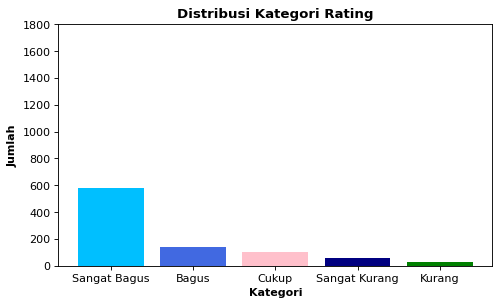

In [791]:
#Visualisasi Label SMS/SPAM Classification

height = data['rating'].value_counts()
labels = ('Sangat Bagus', 'Bagus', 'Cukup' ,'Sangat Kurang', 'Kurang')
y_pos  = np.arange(len(labels))

plt.figure (figsize=(7,4), dpi=80)
plt.ylim(0,1800)
plt.title('Distribusi Kategori Rating', fontweight='bold')
plt.xlabel('Kategori', fontweight='bold')
plt.ylabel('Jumlah',fontweight='bold')
plt.bar(y_pos,height,color=['deepskyblue','royalblue','Pink', 'navy', 'green'])
plt.xticks(y_pos,labels)
plt.show()


###**Text Pre-Processing**

###Folding and filtering

In [792]:
import re

In [793]:
#Buat fungsi langkah dari case folding dan filtering

def casefolding(text):
  text = text.lower() #Mengubah teks menjadi lower case
  text = re.sub(r'https?://\S+|www\.\S+','',text) #Menghapus URL
  text = re.sub(r'[0-9]+','',text) #Menghapus angka
  text = re.sub(r'[^\w\s]','',text) #Karakter tanda baca
  text = text.strip()
  return text


In [794]:
raw_sample = data['reviewContent'].iloc[30]
case_folding = casefolding(raw_sample)

In [795]:
print ('Raw data \t:',raw_sample)
print ('Case folding \t:', case_folding)

Raw data 	: Barang sampai 2 hari dengan selamat dan sesuai deskripsi
Case folding 	: barang sampai  hari dengan selamat dan sesuai deskripsi


###Word Normalization

In [796]:
#Download corpus slang word

!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv

--2022-04-01 15:50:43--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/data/key_norm.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80969 (79K) [text/plain]
Saving to: ‘key_norm.csv.5’

key_norm.csv.5      100%[===================>]  79.07K  --.-KB/s    in 0.002s  

2022-04-01 15:50:43 (33.1 MB/s) - ‘key_norm.csv.5’ saved [80969/80969]



In [797]:
key_norm = pd.read_csv('key_norm.csv')

def text_normalize(text):
  text = ' '.join ([key_norm[key_norm['singkat']==word]['hasil'].values[0] if (key_norm['singkat']==word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

###Stopword Removal

In [798]:
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [799]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stopwords_ind = stopwords.words('indonesian')

In [800]:
len(stopwords_ind)

758

In [801]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [802]:
#Membuat fungsi stopword removal

tambah_stopword = ['kotakom','pucang','nyape']
stopwords_ind = stopwords_ind + tambah_stopword


def remove_stop_word(text):
  clean_word =[]
  text = text.split()
  for word in text:
    if word not in stopwords_ind:
      clean_word.append(word)
  return " ".join(clean_word)  

In [803]:
raw_sample = data['reviewContent'].iloc[30]
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)
stopword_removal = remove_stop_word(normalize)

In [804]:
print ('Raw data \t:',raw_sample)
print ('Case folding \t:', case_folding)
print ('text_normalize \t:', normalize)
print ('Stop word \t:', stopword_removal)

Raw data 	: Barang sampai 2 hari dengan selamat dan sesuai deskripsi
Case folding 	: barang sampai  hari dengan selamat dan sesuai deskripsi
text_normalize 	: barang sampai hari dengan selamat dan sesuai deskripsi
Stop word 	: barang selamat sesuai deskripsi


###Stemming

In [805]:
from nltk.text import TextCollection
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

#Di sini kita buat fungsi stemming

def stemming(text):
  text = stemmer.stem(text)
  return text

In [806]:
raw_sample = data['reviewContent'].iloc[30]
case_folding = casefolding(raw_sample)
normalize = text_normalize(case_folding)
stopword_removal = remove_stop_word(normalize)
text_stemming = stemming(stopword_removal)

In [807]:
print ('Raw data \t:',raw_sample)
print ('Case folding \t:', case_folding)
print ('text_normalize \t:', normalize)
print ('Stop word \t:', stopword_removal)
print ('Stemming \t:', text_stemming)

Raw data 	: Barang sampai 2 hari dengan selamat dan sesuai deskripsi
Case folding 	: barang sampai  hari dengan selamat dan sesuai deskripsi
text_normalize 	: barang sampai hari dengan selamat dan sesuai deskripsi
Stop word 	: barang selamat sesuai deskripsi
Stemming 	: barang selamat sesuai deskripsi


###Pre-Processing Pipeline

In [808]:
def text_preprocessing(text):
  text = casefolding(text)
  text = text_normalize(text)
  text = remove_stop_word(text)
  text = stemming(text)
  return text

In [809]:
#Time untuk mendapatkan waktu komputasi
%%time 
#proses menjalankan fungsi text_preprocessing pada data teks
data['clean_mantap'] = data['reviewContent'].astype(str).apply(text_preprocessing)


CPU times: user 3min 7s, sys: 515 ms, total: 3min 8s
Wall time: 3min 9s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [810]:
#Optional aj yah,
#Simpan data , jika anda ingin menggunakan data clean_teks
#data.to_csv('clean_review.csv')
data

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate,clean_mantap
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,9-Apr-19,androidApp,10/2/2019,bagus mantap sesui pesan
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24-Sep-17,androidApp,10/2/2019,bagus sesuai foto
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,4-Apr-18,androidApp,10/2/2019,okkkkk mantaaaaaaapppp goood
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22-Sep-17,androidApp,10/2/2019,bagus sesuai
7,100002528,beli-harddisk-eksternal,nurfarida,1,NaN,ada pengirimn ntb bima,bima,4,4,0,True,7.22,NaN,androidApp,10/2/2019,bima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,103357924,beli-harddisk-eksternal,Zacky,3,NaN,Tiga Bintang,"Antivirusnya ko malah jd kya virus, tiap di pa...",0,0,0,True,20.36,22 Agu 2017,mobile-app,10/2/2019,antivirusnya ko virus pakai komputer lot
1669,103357924,beli-harddisk-eksternal,Rodiyan,4,NaN,cukup puas,"barang sesuai dengan perkiraan, cuma bonus yan...",0,0,0,True,20.17,10-Jul-17,desktop,10/2/2019,barang sesuai kira bonus sesuai tera kagoll
1670,103357924,beli-harddisk-eksternal,Maulana A.,5,NaN,OK...,great price,0,0,0,True,20.03,17 Mei 2017,desktop,10/2/2019,great harga
1671,103357924,beli-harddisk-eksternal,Octabita H.,5,NaN,MANTAP!,Barang cepet sampainya dan kondisinya sangat B...,0,0,0,True,17.62,NaN,mobile-app,10/2/2019,barang cepat sampai kondisi bagus coba keren c...


###Feature Engineering/Feauture Extraction

In [811]:
X = data['clean_mantap']
y = data['rating']

In [812]:
y

0       5
1       4
2       5
3       4
7       1
       ..
1668    3
1669    4
1670    5
1671    5
1672    5
Name: rating, Length: 910, dtype: int64

In [813]:
X

0                                bagus mantap sesui pesan
1                                       bagus sesuai foto
2                            okkkkk mantaaaaaaapppp goood
3                                            bagus sesuai
7                                                    bima
                              ...                        
1668             antivirusnya ko virus pakai komputer lot
1669          barang sesuai kira bonus sesuai tera kagoll
1670                                          great harga
1671    barang cepat sampai kondisi bagus coba keren c...
1672    barang estimasi tentu packing rapi bonus lengk...
Name: clean_mantap, Length: 910, dtype: object

###Feature Extraction (Bag of Word & N-Gram) (tidak dipakai)

In [814]:
# from sklearn.feature_extraction.text import CountVectorizer

# #BoW  - Unigram
# vec = CountVectorizer(ngram_range=(1,3))
# vec.fit(X)

In [815]:
# #Melihat Jumlah Feature
# print(len(vec.get_feature_names_out()))

In [816]:
# print ('Fitur:', vec.get_feature_names_out(12))

In [817]:
# X_unigram = vec.transform(X).toarray()
# X_unigram 

In [818]:
# data_unigram = pd.DataFrame(X_unigram,columns=vec.get_feature_names_out())
# data_unigram

###Feature Extraction (TF-IDF & N-Gram)

In [819]:
#save model
import pickle

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.text import TextCollection
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


tf_idf = TfidfVectorizer(ngram_range=(1,1))
tf_idf.fit(X)

X_tf_idf = tf_idf.transform(X)

#Save vectorizer.vocabulary_
pickle.dump(tf_idf.vocabulary_,open("feature_tf-idf.pkl","wb"))

In [820]:
#Menampilkan vocabulary dari TF-IDF
tf_idf.vocabulary_

{'bagus': 90,
 'mantap': 903,
 'sesui': 1369,
 'pesan': 1162,
 'sesuai': 1367,
 'foto': 485,
 'okkkkk': 1072,
 'mantaaaaaaapppp': 898,
 'goood': 526,
 'bima': 175,
 'layar': 832,
 'gar': 504,
 'rabu': 1216,
 'soreminggu': 1419,
 'sore': 1418,
 'sampebarang': 1311,
 'specs': 1426,
 'mantabtks': 901,
 'lazada': 835,
 'cicil': 278,
 'pakai': 1110,
 'yacc': 1661,
 'televisi': 1497,
 'suda': 1450,
 'anti': 52,
 'gores': 528,
 'kirim': 751,
 'barang': 122,
 'janji': 643,
 'express': 452,
 'jumat': 666,
 'moga': 979,
 'awet': 81,
 'kualitas': 796,
 'ok': 1067,
 'led': 845,
 'merek': 944,
 'sharp': 1374,
 'hitam': 577,
 'lc': 841,
 'lei': 848,
 'mati': 920,
 'total': 1559,
 'mana': 894,
 'hubung': 586,
 'bantu': 119,
 'mohon': 980,
 'bijak': 172,
 'solusi': 1416,
 'garansi': 507,
 'terimakasih': 1509,
 'super': 1458,
 'sich': 1382,
 'tahan': 1470,
 'cra': 297,
 'nya': 1041,
 'cepat': 261,
 'sipplahhh': 1396,
 'ne': 1008,
 'laptop': 827,
 'packaging': 1101,
 'good': 525,
 'oke': 1068,
 'thnks':

In [821]:
#Melihat Jumlah Fitur
print (len(tf_idf.get_feature_names()))

1669


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [822]:
#Melihat fitur-fitur apa saja yang ada di dalam corpus kita
print(tf_idf.get_feature_names())

['abang', 'aceh', 'adaada', 'adahanya', 'adata', 'adatks', 'add', 'adem', 'admin', 'afiat', 'agan', 'agustus', 'ah', 'air', 'airgaransi', 'ajaaaaa', 'ajatolong', 'akalakalan', 'aktif', 'aktifasi', 'aktifikasi', 'aktivasi', 'aktivasinya', 'akun', 'akurat', 'alamat', 'alas', 'alesan', 'alhamdulillaah', 'alhamdulillah', 'alhamdullilah', 'alias', 'all', 'alngkah', 'aluminium', 'aman', 'amanah', 'amanbeneran', 'amandan', 'ambil', 'amiin', 'amin', 'ampas', 'an', 'anak', 'analog', 'and', 'android', 'aneka', 'anggap', 'antar', 'anter', 'anti', 'antivirus', 'antivirusnya', 'ap', 'apa', 'apajossss', 'aplikasi', 'apple', 'april', 'aqua', 'aquanya', 'aquos', 'arah', 'arduino', 'arrived', 'aryo', 'asa', 'asalasalan', 'asiiiiiiik', 'asli', 'aslialias', 'aspal', 'asus', 'atas', 'ato', 'atur', 'aturany', 'audio', 'awesome', 'awet', 'awetmantap', 'awetpengepakanya', 'baca', 'backlit', 'backpack', 'backup', 'bad', 'bagis', 'bagus', 'bagusberfungsi', 'bagusjos', 'baguspasang', 'baguss', 'bagusss', 'bagus

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [823]:
#Lihat data tabular yang menggunakan metode TF-IDF
#Data ini siap untuk dimasukkan dalam proses machine learning

x1 = tf_idf.transform(X).toarray()
data_tabular_tf_idf= pd.DataFrame(x1,columns=tf_idf.get_feature_names())
data_tabular_tf_idf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abang,aceh,adaada,adahanya,adata,adatks,add,adem,admin,afiat,...,ya,yaa,yacc,yah,yampe,yangbbelum,yanpa,yapersyaratan,yey,youtube
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Feature Selection

In [824]:
X = np.array(data_tabular_tf_idf)
y = np.array(y)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [825]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Proses Algoritme
chi2_features = SelectKBest(chi2, k=1579)
X_kbest_features = chi2_features.fit_transform(X,y)

#Melihat data
print ('Original feature:',X.shape[1])
print ('selected feature:',X_kbest_features.shape[1])

Original feature: 1669
selected feature: 1579


In [826]:
#Membuat dataframe nilai setiap fitur dari Chi-square

data_chi2 = pd.DataFrame(chi2_features.scores_,columns=['Nilai'])
data_chi2

,Nilai
0,3.906998
1,1.576221
2,1.576221
3,1.981752
4,0.266911
...,...
1664,0.115485
1665,2.215029
1666,4.013457
1667,0.198983


In [827]:
feature = tf_idf.get_feature_names_out()
feature

data_chi2['Fitur'] = feature
data_chi2

,Nilai,Fitur
0,3.906998,abang
1,1.576221,aceh
2,1.576221,adaada
3,1.981752,adahanya
4,0.266911,adata
...,...,...
1664,0.115485,yangbbelum
1665,2.215029,yanpa
1666,4.013457,yapersyaratan
1667,0.198983,yey


In [828]:
#Mengurutkan fitur berdasarkan nilai tertinggi
data_chi2.sort_values(by='Nilai', ascending=False)

,Nilai,Fitur
1482,23.019034,tanggal
1337,22.954446,segituu
147,22.862802,benget
694,21.475737,karawang
760,21.475737,klwdi
...,...,...
739,0.061176,kesel
1599,0.061176,unuk
529,0.061176,gosah
1136,0.061176,pemakaianhasil


In [829]:
#Menampilkan mask pada feature yang terseleksi

#False berarti fitur tidak terpilih dan True berarti fitur terpilih
mask = chi2_features.get_support()
mask

array([ True,  True,  True, ...,  True,  True,  True])

In [830]:
feature

array(['abang', 'aceh', 'adaada', ..., 'yapersyaratan', 'yey', 'youtube'],
      dtype=object)

In [831]:
#Menampilkan fitur-fitur terpilih berdasarkan nilai mask atau nila tertinggi yang sudah ditetapkan pada Chi-Square

new_feature=[]

for bool,f in zip(mask,feature):
    if bool:
        new_feature.append(f)
    selected_feature=new_feature
selected_feature

['abang',
 'aceh',
 'adaada',
 'adahanya',
 'adata',
 'adatks',
 'add',
 'adem',
 'admin',
 'afiat',
 'agustus',
 'ah',
 'air',
 'airgaransi',
 'ajaaaaa',
 'ajatolong',
 'akalakalan',
 'aktif',
 'aktifasi',
 'aktifikasi',
 'aktivasi',
 'aktivasinya',
 'akun',
 'alamat',
 'alas',
 'alesan',
 'alhamdulillaah',
 'alhamdulillah',
 'alhamdullilah',
 'alias',
 'all',
 'alngkah',
 'aluminium',
 'aman',
 'amanah',
 'amanbeneran',
 'amandan',
 'ambil',
 'amiin',
 'amin',
 'ampas',
 'an',
 'anak',
 'analog',
 'and',
 'android',
 'aneka',
 'anggap',
 'antar',
 'anter',
 'anti',
 'antivirus',
 'antivirusnya',
 'ap',
 'apa',
 'apajossss',
 'aplikasi',
 'apple',
 'april',
 'aqua',
 'aquanya',
 'aquos',
 'arah',
 'arduino',
 'arrived',
 'aryo',
 'asalasalan',
 'asiiiiiiik',
 'asli',
 'aslialias',
 'aspal',
 'asus',
 'atas',
 'ato',
 'atur',
 'aturany',
 'audio',
 'awet',
 'awetmantap',
 'awetpengepakanya',
 'baca',
 'backlit',
 'backpack',
 'backup',
 'bad',
 'bagis',
 'bagus',
 'bagusberfungsi',
 'b

In [832]:
# Membuat vocabulary baru berdasarkan fitur yang terseleksi
#Ini digunakan untuk mengenerate fitur vector tf-idf pada proses deployment

new_selected_features = {}

for (k,v) in tf_idf.vocabulary_.items():
    if k in selected_features:
        new_selected_features[k] = v

new_selected_features




{'bagus': 90,
 'mantap': 903,
 'sesui': 1369,
 'pesan': 1162,
 'sesuai': 1367,
 'foto': 485,
 'okkkkk': 1072,
 'mantaaaaaaapppp': 898,
 'goood': 526,
 'bima': 175,
 'layar': 832,
 'gar': 504,
 'rabu': 1216,
 'soreminggu': 1419,
 'sore': 1418,
 'sampebarang': 1311,
 'specs': 1426,
 'mantabtks': 901,
 'lazada': 835,
 'cicil': 278,
 'pakai': 1110,
 'yacc': 1661,
 'televisi': 1497,
 'suda': 1450,
 'anti': 52,
 'gores': 528,
 'kirim': 751,
 'barang': 122,
 'janji': 643,
 'express': 452,
 'jumat': 666,
 'moga': 979,
 'awet': 81,
 'kualitas': 796,
 'ok': 1067,
 'led': 845,
 'merek': 944,
 'sharp': 1374,
 'hitam': 577,
 'lc': 841,
 'lei': 848,
 'mati': 920,
 'total': 1559,
 'mana': 894,
 'hubung': 586,
 'bantu': 119,
 'mohon': 980,
 'bijak': 172,
 'solusi': 1416,
 'garansi': 507,
 'terimakasih': 1509,
 'super': 1458,
 'sich': 1382,
 'tahan': 1470,
 'cra': 297,
 'nya': 1041,
 'cepat': 261,
 'sipplahhh': 1396,
 'ne': 1008,
 'laptop': 827,
 'packaging': 1101,
 'good': 525,
 'oke': 1068,
 'thnks':

In [833]:
#Melihat jumlah fitur baru 
#Ini sesuai dengan nilai k pada chi-square
len(new_selected_features)

1579

In [834]:
#Save vectorizer.vocabulary_
#Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(new_selected_features,open("selected_feature_tf-idf.pkl","wb"))

In [835]:
data_selected_features = pd.DataFrame(X_kbest_features,columns=new_selected_features)
data_selected_features

,bagus,mantap,sesui,pesan,sesuai,foto,okkkkk,mantaaaaaaapppp,goood,bima,...,dunia,pos,aktif,titannya,valid,memberitahukan,overallgokillah,bonusnyathanks,fix,kagoll
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [836]:
selected_x = X_kbest_features
selected_x.shape

(910, 1579)

# Modelling (Machine Learning)

In [844]:
#Import Library
import random
from sklearn.model_selection import train_test_split

#Algoritme
#Algoritme yang dikomparasi
from sklearn import svm
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [845]:
x = selected_x
y = data.rating
#Memisihkan data training dan data testing dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=365)

In [846]:
#print
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 728
Banyak data x_test  : 182
Banyak data y_train : 728
Banyak data y_test  : 182


In [847]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritme fitting

text_algorithm = MultinomialNB()
#text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_naive.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

#y_train

Duration: 0:00:00.029022


In [848]:
#Prediksi
predicted = model.predict(x_test)

#Hasil ini akan kita bandingkan dengan nilai y_test (labeling dari manusia)
predicted

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5])

# Model Evaluation

In [849]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()
    
print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted))

prediksi benar:  113  data
prediksi salah:  69  data
Akurasi Algoritme:  62.08791208791209 %
TRUE NEGATIVE (TN): 0
FALSE NEGATIVE (FN): 0
TRUE POSITIVE (TP): 0
FALSE POSITIVE (FP): 0
PRECISION: nan %
RECALL: nan %
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        34
           5       0.62      1.00      0.77       113

    accuracy                           0.62       182
   macro avg       0.12      0.20      0.15       182
weighted avg       0.39      0.62      0.48       182



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are il

In [850]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.64285714 0.62637363 0.65934066 0.61538462 0.64835165 0.60989011
 0.6043956  0.68681319 0.62637363 0.65384615]
accuracy:  0.6373626373626373


In [851]:
from joblib import load

                        
#Hasil
pipeline = load("model_sentiment_naive.joblib")

data_input = input("Masukkan sentiment:\n")
data_input = text_preprocessing(data_input)

#Load
tfidf = TfidfVectorizer


#loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(new_selected_features))
loaded_vec = TfidfVectorizer(decode_error="replace", vocabulary=set(pickle.load(open("selected_feature_tf-idf.pkl", "rb"))))

hasil = pipeline.predict(loaded_vec.fit_transform([data_input]))

#print("Hasil Preprocessing:\n", proses)

if(hasil==1):
    s ="Sangat Kurang"
elif (hasil==2):
    s ="Kurang"
elif (hasil==3):
    s ="Cukup"
elif (hasil==4):
    s ="Bagus"
elif (hasil==5):
    s ="Sangat Bagus"
else:
    s ="Belum dimodelkan"
    
print("Hasil prediksi:\n", s) 

Masukkan sentiment:
Bagus
Hasil prediksi:
 Sangat Bagus


# Model 2

In [856]:
#Training Model

from datetime import datetime
start_time = datetime.now()
from joblib import dump
#algoritme fitting

#text_algorithm = MultinomialNB()
text_algorithm = svm.SVC(kernel="rbf", C=1.0)

model = text_algorithm.fit(x_train, y_train)

# save the model to disk
dump(model, filename="model_sentiment_naive.joblib")

end_time = datetime.now()
result_time  =end_time-start_time
print("Duration:",result_time)

Duration: 0:00:00.667513


In [859]:
#Library evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()
    
print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

CM = confusion_matrix(y_test,predicted)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
precision    = TP/(TP+FP)
recall       = TP/(TP+FN)
print ("TRUE NEGATIVE (TN):",TN)
print ("FALSE NEGATIVE (FN):",FN)
print ("TRUE POSITIVE (TP):",TP)
print ("FALSE POSITIVE (FP):",FP)
print ("PRECISION:",precision*100,"%")
print ("RECALL:",recall*100,"%")
print(classification_report(y_test,predicted))

prediksi benar:  113  data
prediksi salah:  69  data
Akurasi Algoritme:  62.08791208791209 %
TRUE NEGATIVE (TN): 0
FALSE NEGATIVE (FN): 0
TRUE POSITIVE (TP): 0
FALSE POSITIVE (FP): 0
PRECISION: nan %
RECALL: nan %
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        34
           5       0.62      1.00      0.77       113

    accuracy                           0.62       182
   macro avg       0.12      0.20      0.15       182
weighted avg       0.39      0.62      0.48       182



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in long_scalars
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are il

In [860]:
#Menggunakan Cross Validation untuk memvalidasi data

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv        = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
accuracy= (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)
print ("accuracy: ",accuracy)
print ("accuracy: ",score_accuracy)

accuracy:  [0.63186813 0.62637363 0.65934066 0.61538462 0.64835165 0.60989011
 0.6043956  0.68681319 0.62637363 0.64285714]
accuracy:  0.6351648351648351


###Word Cloud

In [852]:
import cv2
from wordcloud import WordCloud


#download gambar masking
!wget https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg

--2022-04-01 15:55:38--  https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34396 (34K) [image/jpeg]
Saving to: ‘cloud.jpg.3’

cloud.jpg.3         100%[===================>]  33.59K  --.-KB/s    in 0s      

2022-04-01 15:55:38 (78.3 MB/s) - ‘cloud.jpg.3’ saved [34396/34396]



In [853]:
original_image = cv2.imread('cloud.jpg')
grayimage = cv2.cvtColor(original_image,cv2.COLOR_BGR2GRAY)
(tresh,cloud_mask) = cv2.threshold(grayimage,100,255,cv2.THRESH_BINARY)

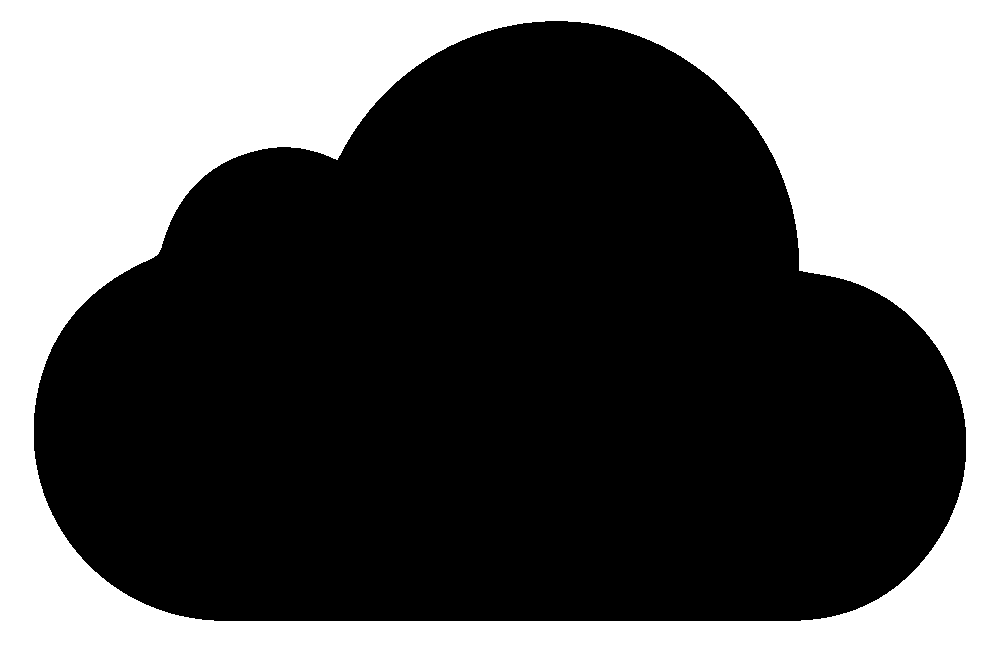

In [854]:
from google.colab.patches import cv2_imshow

cv2_imshow(cloud_mask)

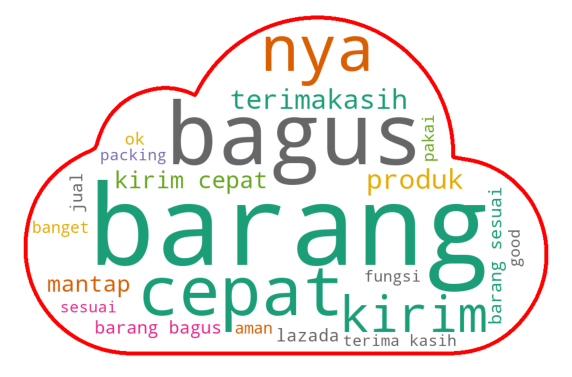

In [855]:
#Word cloud untuk sangat kurang

sangat_bagus = data[data.rating==5]
normal_string = []

for t in sangat_bagus.clean_mantap:
  normal_string.append(t)

normal_string = pd.Series(normal_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800, margin=10,background_color='white',colormap='Dark2',max_font_size=200,min_font_size=25,
                      mask=cloud_mask,contour_width=10 , contour_color='red',max_words=100).generate(normal_string)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Terima kasih coach